In [104]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
#import camb as cb
%matplotlib inline

In [105]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft 
from scipy.fftpack import ifft 
from numpy.linalg import inv
from __future__ import division

In [106]:
#hitsmap part 
#Hitmap=np.random.rand(10,10) #generate random array and graph 
#np.clip(Hitmap,0,1) 
#Hitmap=[[0.22,0.84,0.55],[0.41,0.06,0.67],[0.90,0.72,0.33]]
Hitmap=[[0.22,0.84,0.57,0.46,0.93],[0.41,0.06,0.72,0.38,0.16],[0.91,0.38,0.67,0.99,0.44],[0.74,0.93,0.62,0.27,0.46],[0.74,0.35,0.85,0.65,0.38]]
print('Array of Hitmap',Hitmap)

Array of Hitmap [[0.22, 0.84, 0.57, 0.46, 0.93], [0.41, 0.06, 0.72, 0.38, 0.16], [0.91, 0.38, 0.67, 0.99, 0.44], [0.74, 0.93, 0.62, 0.27, 0.46], [0.74, 0.35, 0.85, 0.65, 0.38]]


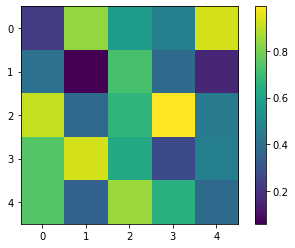

In [107]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)

In [108]:
M=np.mean(Hitmap)
print('mean of Hitmap',M) 
length=len(Hitmap)
print('length of Hitmap',length)

mean of Hitmap 0.5652
length of Hitmap 5


In [109]:
#Fourrier Space Amplitude

In [110]:
#A_noise

In [111]:
Spectrum=np.fft.fft(Hitmap) #fft of Hitmap
#Spectrum=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrum=np.fft.fftn(Hitmap) #fftn of Hitmap
Abs=np.abs(Spectrum)
#print(Spectrum)
#print(Abs)

Inverse=inv(np.matrix(Hitmap))
#Transpose=np.transpose(Hitmap)

A_noise= Inverse * Abs 
#A_noise=np.abs(A_n*A_n)#squaring the amplitude
print('A_noise',A_noise) 

A_noise [[ 1.         -5.77765134 -4.01898988 -4.01898988 -5.77765134]
 [ 1.          6.50696596  2.80268056  2.80268056  6.50696596]
 [ 1.          2.46718045  1.79598338  1.79598338  2.46718045]
 [ 1.          5.24744961  3.81335209  3.81335209  5.24744961]
 [ 1.         -8.54336968 -3.59191202 -3.59191202 -8.54336968]]


In [112]:
#plt.colorbar(imshow(Abs))
#imshow(Abs)

In [113]:
#plt.colorbar(imshow(Inverse))
#imshow(Inverse)

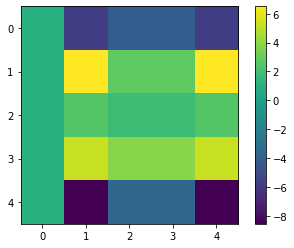

In [114]:
plt.colorbar(imshow(A_noise))
imshow(A_noise)
#the ends have always been uniform
#there may be something wrong with the fourier transform

In [117]:
def Noisemap(Hitmap,A_noise): 
    rand=np.random.rand(5,5) #random array 
    np.clip(rand,0,1) 
    print('rand',rand)
    Inital = (np.fft.ifft(A_noise))*rand #inverse fourier transform to turn into real space
    Final = np.abs(Inital/Hitmap)
    print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)

rand [[0.16626202 0.54076274 0.60273288 0.86085831 0.60062923]
 [0.49990775 0.79316844 0.0585454  0.95420932 0.18357881]
 [0.70260852 0.6709907  0.16115802 0.94291193 0.2191006 ]
 [0.88813792 0.28667397 0.06689306 0.86512556 0.31488374]
 [0.65814369 0.0016607  0.86176883 0.9789162  0.45916169]]
Inital [[-6.18271356e-01+0.j  4.25264180e-01+0.j  9.48046258e-01+0.j
   1.35405504e+00+0.j  4.72344115e-01+0.j]
 [ 1.96156733e+00+0.j  7.72060211e-02+0.j -9.12879789e-02+0.j
  -1.48786811e+00+0.j  1.78693314e-02+0.j]
 [ 1.33865580e+00+0.j -5.11510679e-02+0.j -6.06599767e-02+0.j
  -3.54912626e-01+0.j -1.67025114e-02+0.j]
 [ 3.39652422e+00+0.j -1.10485930e-01+0.j -6.86827242e-02+0.j
  -8.88271242e-01+0.j -1.21358151e-01+0.j]
 [-3.06307489e+00+0.j  5.08751956e-04+0.j  2.17226738e+00+0.j
   2.46756166e+00+0.j  1.40663531e-01+0.j]]
Final [[2.81032435e+00 5.06266881e-01 1.66323905e+00 2.94359791e+00
  5.07896898e-01]
 [4.78431055e+00 1.28676702e+00 1.26788860e-01 3.91544238e+00
  1.11683322e-01]
 [1.4

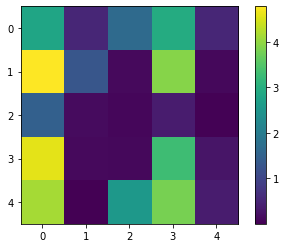

In [118]:
Noisemap(Hitmap,A_noise)